<a href="https://colab.research.google.com/github/danisotoguerrero/Clasificador-de-canciones/blob/main/Laboratorio_2_Grupo_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificador de canciones de Spotify**

## Preparacíon

In [ ]:
# Importamos las bibliotecas que sabemos que vamos a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# Para leer datos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path de la carpeta donde tenemos los datos ---> Solo hay que cambiar esta parte
folder = "/content/drive/MyDrive/UNI/Big Data/"

In [ ]:
# Carga de datos
df = pd.read_csv(folder + "Canciones_Spotify.csv")
# Elimina las columnas
df = df.drop(['song_title', 'artist','time_signature','Unnamed: 0'], axis=1)
df.sample(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,target
1252,0.2020,0.497,249640,0.604,0.000000,2,0.299,-9.438,1,0.0313,131.935,0.225,0
398,0.0414,0.811,312360,0.635,0.142000,7,0.204,-8.394,1,0.0971,137.595,0.752,1
1111,0.1320,0.730,207307,0.701,0.000000,5,0.151,-5.885,0,0.1060,175.950,0.789,0
1278,0.0024,0.547,228040,0.511,0.000001,11,0.109,-5.802,1,0.0294,143.968,0.179,0
961,0.0853,0.864,126467,0.552,0.778000,5,0.094,-8.851,0,0.0495,112.378,0.740,1


## Hipótesis 1
Haciendo varias cargas de parámetros de manera aleatoria de entre 5 a 10 conjunto de datos. Se analizó manualmente los parámetros que mejor coincidieran. De esta manera que llego a la hipótesis de que:

> Al usuario generalmente le gustan las canciones más bailables, con valores de volumen alto y que tanto la energía como la valencia de estas canciones superan o están al rededor de los 0.5.

Para no quedarnos solo con un análisis humano, entrecruzamos las variables para determinar los mayores puntos de relación. Concluyendo que los de mejores correlaciones son los Energy y Loudness, y en segundo lugar los Danceability y Valance.


## Conclucion 1
Solo considerando los parámetros de "danceability", "energy", "valence", "loudness". Los resultados no tuvieron grades cambios, aun así los resultados pueden ser considerados como positivos para la muestra. Si colocáramos el restante de los parámetros podríamos mejorar el entre cruzamiento de datos.

## Hipotesis 2
Ya que los resultados anteriores no obtuvieron fueron bien entrenados, la nueva hipotesis concidera que "*si dos características muestran una alta correlación, esto indica que ofrecen información redundante y, por lo tanto, pueden comprometer la eficiencia del modelo. En situaciones donde dos características están altamente correlacionadas, es preferible utilizar solo una de ellas.*"

> Teniendo en cuanta eso, los datos consideramos son "danceability", "speechiness", "energy", "acousticness", "instrumentalness".



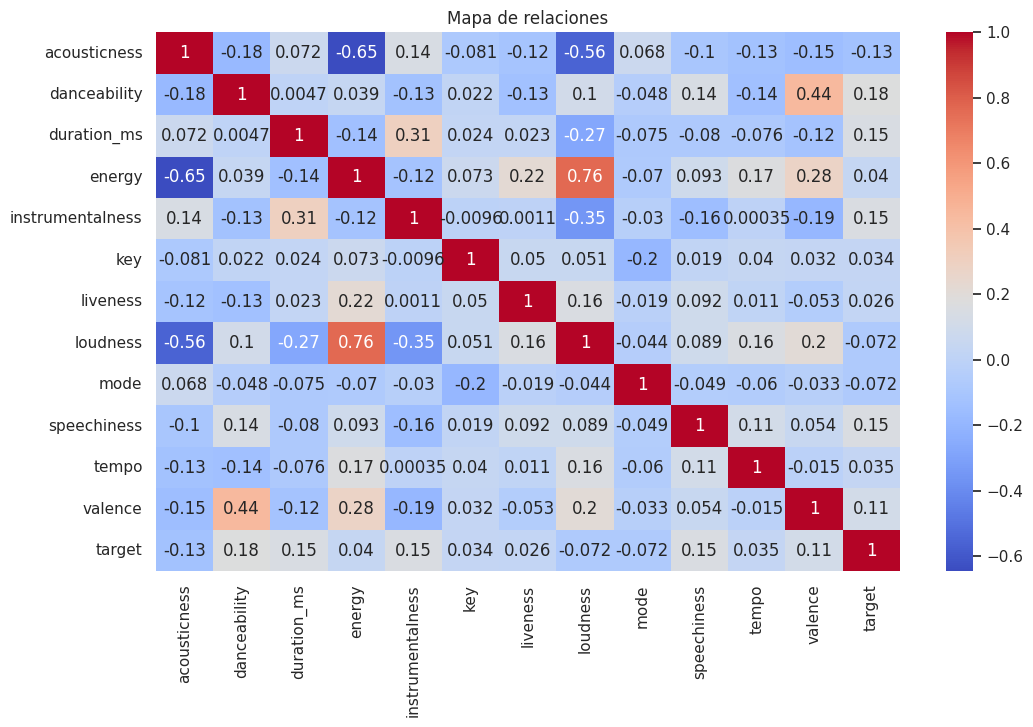

In [ ]:
# Gráfico de mapa de calor
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de relaciones')
plt.show()

In [ ]:
# Parametros considerados
selected_features = df[["danceability", "speechiness", "energy","acousticness", "instrumentalness"]]

In [ ]:
from sklearn.model_selection import train_test_split

# Separar características (X) y etiquetas (y)
X = selected_features
y = df["target"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Realizar varios modelos de Machine Learning:

In [ ]:
# Creación del modelo y ajuste (entrenamiento)
knn_model = KNeighborsClassifier()
svm_model = SVC()
dt_model = DecisionTreeClassifier()
nb_model = GaussianNB()

# Entrenar los modelos con los datos
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

GaussianNB()

## Realizar algún tipo de validación:

Validación cruzada para evaluar la precisión del los modelos. Esto permite obtener una estimación más robusta del rendimiento de los modelos utilizando diferentes particiones de los datos de entrenamiento.

In [ ]:
# Validación cruzada k-fold
knn_scores = cross_val_score(knn_model, X_train, y_train, cv=5)
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=5)
nb_scores = cross_val_score(nb_model, X_train, y_train, cv=5)

# Muestra los puntajes promedio de validación cruzada para cada modelo
print("K-Nearest Neighbors (KNN) - Puntaje promedio:", knn_scores.mean())
print("Support Vector Machines (SVM) - Puntaje promedio:", svm_scores.mean())
print("Árbol de decisión - Puntaje promedio:", dt_scores.mean())
print("Naive Bayes - Puntaje promedio:", nb_scores.mean())

K-Nearest Neighbors (KNN) - Puntaje promedio: 0.644160913793435
Support Vector Machines (SVM) - Puntaje promedio: 0.6794877218622002
Árbol de decisión - Puntaje promedio: 0.6553121935272965
Naive Bayes - Puntaje promedio: 0.6292540814952983


 Parece que el Support Vector Machines (SVM) tiene el puntaje promedio más alto, seguido por el Árbol de decisión (Decision Tree). El K-Nearest Neighbors (KNN) y Naive Bayes tienen puntajes ligeramente más bajos en comparación.

## Evaluación y análisis del rendimiento de cada modelo:

In [ ]:
# Función para imprimir métricas
def print_metrics(model_name, y_true, y_pred):
    print(f"Modelo: {model_name}")
    print("Matriz de Confusión:")
    print(confusion_matrix(y_true, y_pred))
    print("Precisión:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("\n")

# Calcula y muestra las métricas para cada modelo
print_metrics("K-Nearest Neighbors (KNN)", y_test, knn_model.predict(X_test))
print_metrics("Support Vector Machines (SVM)", y_test, svm_model.predict(X_test))
print_metrics("Árbol de decisión", y_test, dt_model.predict(X_test))
print_metrics("Naive Bayes", y_test, nb_model.predict(X_test))


Modelo: K-Nearest Neighbors (KNN)
Matriz de Confusión:
[[141  65]
 [ 76 122]]
Precisión: 0.6524064171122995
Recall: 0.6161616161616161
F1-Score: 0.6337662337662338


Modelo: Support Vector Machines (SVM)
Matriz de Confusión:
[[158  48]
 [ 90 108]]
Precisión: 0.6923076923076923
Recall: 0.5454545454545454
F1-Score: 0.6101694915254238


Modelo: Árbol de decisión
Matriz de Confusión:
[[132  74]
 [ 69 129]]
Precisión: 0.6354679802955665
Recall: 0.6515151515151515
F1-Score: 0.6433915211970074


Modelo: Naive Bayes
Matriz de Confusión:
[[140  66]
 [ 77 121]]
Precisión: 0.6470588235294118
Recall: 0.6111111111111112
F1-Score: 0.6285714285714287




El modelo Support Vector Machines (SVM) tiene una precisión más alta, pero un recall ligeramente más bajo en comparación con el K-Nearest Neighbors (KNN) y el Naive Bayes. El Árbol de decisión tiene un recall más alto, aunque la precisión es ligeramente menor.

## Ajustar para cada uno de los modelos los hiper parámetros:

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10, 20, 30, 50, 90], 'gamma': ["auto", "scale",0.1, 1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters, scoring='f1_macro') #Usamos el randomsearch para ver cual decide como los mejores parametros
clf.fit(X_train, y_train)

print("Mejores parámetros:", clf.best_params_)

print("Mejor score:", clf.best_score_)


Mejores parámetros: {'C': 90, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor score: 0.6983559030621357


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

model = SVC()

# Definir el espacio de búsqueda de hiperparámetros específico para SVM
parameters = {
    'C': [0.1, 1, 10, 20, 30, 50, 90],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))
}
clf = RandomizedSearchCV(model, parameters)
search = clf.fit(X, y)

print("Mejores parámetros:", search.best_params_)
print("Mejor score:", search.best_score_)

Mejores parámetros: {'kernel': 'rbf', 'gamma': 'scale', 'C': 20}
Mejor score: 0.6440053558705747


## Regresion logica

In [ ]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()     #Entrenamos el modelo

Optimization terminated successfully.
         Current function value: 0.633446
         Iterations 5


In [ ]:
predicciones = modelo.predict(exog = X_train)

clasificacion = np.where(predicciones<0.5, 0, 1)

In [ ]:
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.46, 0, 1) #Modificamos el rango de tendencia debido a que aumentaba la prediccion
f1 = f1_score(y_test, clasificacion)
recall = recall_score(y_test, clasificacion)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
          normalize = True
         )
print(f"El accuracy de test es: {100*accuracy}%")
print("Score de F1:", f1)
print("Recall score:", recall)


El accuracy de test es: 60.64356435643564%
Score de F1: 0.6378132118451025
Recall score: 0.7070707070707071


## Realizar un ensamble de los modelos:

In [ ]:
from sklearn.ensemble import VotingClassifier

# Inicializa los modelos con sus mejores hiperparámetros encontrados
knn_best = KNeighborsClassifier(n_neighbors=9)
svm_best = SVC(C=9.446628357319023, gamma=0.8739155762551166)
# Inicializa otros modelos ajustados con sus mejores hiperparámetros aquí

# Crea el ensamble por votación mayoritaria
voting_ensemble = VotingClassifier(estimators=[
    ('KNN', knn_best),
    ('SVM', svm_best),
    # Agrega otros modelos ajustados aquí
], voting='hard')  # 'hard' para votación por mayoría

# Entrena el ensamble con tus datos
voting_ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=9)),
                             ('SVM',
                              SVC(C=9.446628357319023,
                                  gamma=0.8739155762551166))])

In [ ]:
# Realiza predicciones en el conjunto de datos de prueba
y_pred_ensemble = voting_ensemble.predict(X_test)

print("Matriz de Confusión del Ensamble:")
print(confusion_matrix(y_test, y_pred_ensemble))

print("\nPrecisión del Ensamble:", precision_score(y_test, y_pred_ensemble))
print("Recall del Ensamble:", recall_score(y_test, y_pred_ensemble))
print("F1-Score del Ensamble:", f1_score(y_test, y_pred_ensemble))
print("Exactitud (Accuracy) del Ensamble:", accuracy_score(y_test, y_pred_ensemble))


Matriz de Confusión del Ensamble:
[[169  37]
 [104  94]]

Precisión del Ensamble: 0.7175572519083969
Recall del Ensamble: 0.47474747474747475
F1-Score del Ensamble: 0.5714285714285714
Exactitud (Accuracy) del Ensamble: 0.650990099009901


Parece que el ensamble por votación mayoritaria tiene una precisión decente, pero un recall relativamente bajo. Esto indica que el modelo tiene un buen rendimiento para predecir la clase positiva (0 en este caso), pero no tan bien para predecir la clase negativa (1 en este caso). El F1-score, que combina precisión y recall, también muestra un desempeño moderado.

## Reajustar para cada uno de los modelos los hiper parámetros:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define los rangos de hiperparámetros para la búsqueda aleatoria
knn_param_dist = {'n_neighbors': randint(1, 20)}
svm_param_dist = {'C': uniform(0.1, 10), 'kernel': ['linear', 'rbf']}
dt_param_dist = {'max_depth': [None, 5, 10, 15]}

# Crea objetos RandomizedSearchCV para cada modelo
knn_random = RandomizedSearchCV(KNeighborsClassifier(), knn_param_dist, n_iter=10, cv=5)
svm_random = RandomizedSearchCV(SVC(), svm_param_dist, n_iter=10, cv=5)
dt_random = RandomizedSearchCV(DecisionTreeClassifier(), dt_param_dist, n_iter=10, cv=5)

# Realiza la búsqueda aleatoria
knn_random.fit(X_train, y_train)
svm_random.fit(X_train, y_train)
dt_random.fit(X_train, y_train)

# Obtiene los mejores hiperparámetros
best_knn_random = knn_random.best_params_
best_svm_random = svm_random.best_params_
best_dt_random = dt_random.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
# Usar los mejores hiperparámetros encontrados por la búsqueda aleatoria
best_knn_random_model = KNeighborsClassifier(n_neighbors=best_knn_random['n_neighbors'])
best_svm_random_model = SVC(C=best_svm_random['C'], kernel=best_svm_random['kernel'])
best_dt_random_model = DecisionTreeClassifier(max_depth=best_dt_random['max_depth'])

# Entrenar los modelos con los mejores hiperparámetros
best_knn_random_model.fit(X_train, y_train)
best_svm_random_model.fit(X_train, y_train)
best_dt_random_model.fit(X_train, y_train)

# Evaluar el rendimiento de los modelos en el conjunto de prueba
best_knn_random_score = best_knn_random_model.score(X_test, y_test)
best_svm_random_score = best_svm_random_model.score(X_test, y_test)
best_dt_random_score = best_dt_random_model.score(X_test, y_test)

print("Rendimiento de los modelos ajustados con búsqueda aleatoria:")
print("KNN:", best_knn_random_score)
print("SVM:", best_svm_random_score)
print("Decision Tree:", best_dt_random_score)

Rendimiento de los modelos ajustados con búsqueda aleatoria:
KNN: 0.6658415841584159
SVM: 0.6707920792079208
Decision Tree: 0.6881188118811881


El Árbol de decisión tuvo un buen aumento en su precisión. El SVM también mejoró su rendimiento, y aunque el KNN no cambió demasiado, sigue siendo una mejora respecto a su desempeño previo.

## Evaluación y análisis del rendimiento:

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Función para imprimir métricas
def print_metrics(y_true, y_pred, model_name):
    print(f"Modelo: {model_name}")
    print("Matriz de Confusión:")
    print(confusion_matrix(y_true, y_pred))
    print("Precisión:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("\n")

# Imprimir métricas para el modelo de votación
print_metrics(y_test, y_pred_voting, "Modelo de Votación")

# Imprimir métricas para cada modelo individual
print_metrics(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")
print_metrics(y_test, y_pred_svm, "Support Vector Machines (SVM)")
print_metrics(y_test, y_pred_dt, "Árbol de decisión")
print_metrics(y_test, y_pred_nb, "Naive Bayes")


Modelo: Modelo de Votación
Matriz de Confusión:
[[165  41]
 [ 90 108]]
Precisión: 0.7248322147651006
Recall: 0.5454545454545454
F1-Score: 0.622478386167147


Modelo: K-Nearest Neighbors (KNN)
Matriz de Confusión:
[[141  65]
 [ 76 122]]
Precisión: 0.6524064171122995
Recall: 0.6161616161616161
F1-Score: 0.6337662337662338


Modelo: Support Vector Machines (SVM)
Matriz de Confusión:
[[158  48]
 [ 90 108]]
Precisión: 0.6923076923076923
Recall: 0.5454545454545454
F1-Score: 0.6101694915254238


Modelo: Árbol de decisión
Matriz de Confusión:
[[129  77]
 [ 75 123]]
Precisión: 0.615
Recall: 0.6212121212121212
F1-Score: 0.6180904522613064


Modelo: Naive Bayes
Matriz de Confusión:
[[140  66]
 [ 77 121]]
Precisión: 0.6470588235294118
Recall: 0.6111111111111112
F1-Score: 0.6285714285714287




El modelo de votación parece tener una precisión bastante alta, pero su recall y F1-score están algo más bajos. En contraste, el modelo KNN tiene un F1-score ligeramente más alto y una precisión similar. El modelo SVM muestra una precisión cercana al modelo de votación, pero su F1-score y recall son un poco más bajos.

El modelo de Árbol de Decisión tiene una precisión más baja en comparación con los otros modelos, pero su recall es un poco más alto. El Naive Bayes parece tener una precisión y recall equilibrados, aunque su F1-score es un poco más bajo que el de otros modelos.

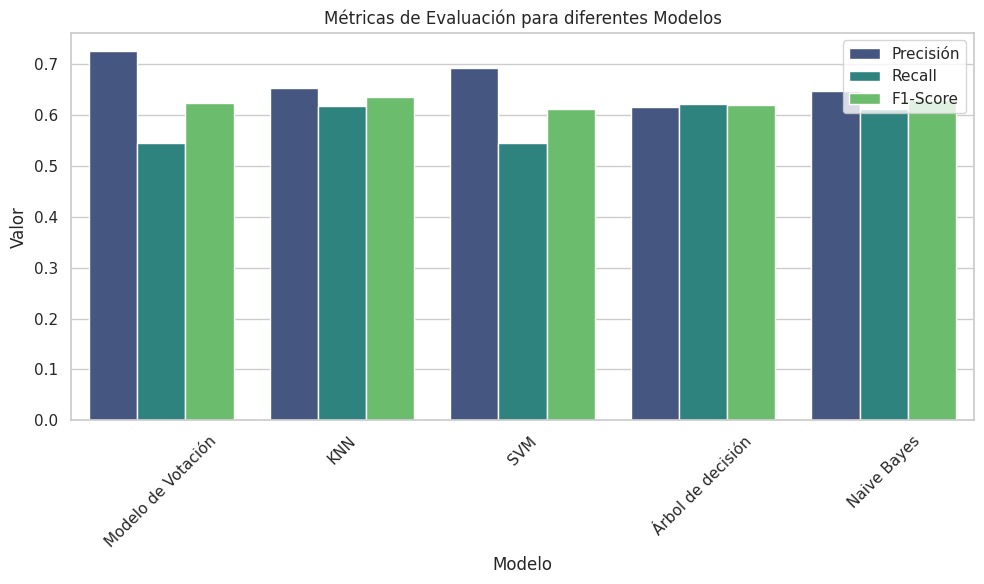

In [ ]:
# Define los valores de precisión, recall y F1-score para cada modelo
precision = [0.724, 0.652, 0.692, 0.615, 0.647]
recall = [0.545, 0.616, 0.545, 0.621, 0.611]
f1_score = [0.622, 0.634, 0.610, 0.618, 0.629]
models = ['Modelo de Votación', 'KNN', 'SVM', 'Árbol de decisión', 'Naive Bayes']

# Crea un DataFrame con las métricas
data = pd.DataFrame({'Modelo': models, 'Precisión': precision, 'Recall': recall, 'F1-Score': f1_score})
data = data.melt('Modelo', var_name='Métrica', value_name='Valor')

# Grafica las métricas
plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='Valor', hue='Métrica', data=data, palette='viridis')
plt.title('Métricas de Evaluación para diferentes Modelos')
plt.xlabel('Modelo')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Aunque el SVM tiene la precisión más alta, su recall y F1-score son más bajos. Esto sugiere que el SVM podría estar cometiendo más falsos negativos, es decir, está fallando en identificar algunas muestras positivas. Esta discrepancia puede ser importante según el contexto del problema.

En contraste, el KNN, Naive Bayes y Árbol de Decisión podrían estar teniendo un mejor equilibrio entre precisión y recall, lo que significa que están clasificando más muestras positivas correctamente a expensas de algunos falsos positivos.

## Reevalucion

In [ ]:
X = df[["danceability", "speechiness", "energy","acousticness", "instrumentalness"]].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=53)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
escaladorX = MinMaxScaler()
X_train = escaladorX.fit_transform(X_train.astype('float64'))
X_test  = escaladorX.transform(X_test.astype('float64'))
X_test[:5,:]

array([[7.70301624e-01, 4.81836529e-02, 5.99551661e-01, 7.81449852e-03,
        0.00000000e+00],
       [6.67053364e-01, 1.08476287e-02, 6.76992052e-01, 2.95870718e-04,
        6.90573770e-03],
       [5.99767981e-01, 1.62714430e-02, 8.49195028e-01, 6.64278354e-02,
        2.04918033e-02],
       [5.81206497e-01, 1.51362260e-02, 8.05380069e-01, 1.56738314e-02,
        7.87909836e-02],
       [5.29002320e-01, 4.88143290e-02, 8.66517220e-01, 7.04062559e-03,
        0.00000000e+00]])

In [ ]:
from sklearn.naive_bayes import GaussianNB as Bayesiano
clasificador = Bayesiano()
clasificador.fit(X_train, y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Realizar predicciones en los datos de prueba
y_pred = clasificador.predict(X_test)

# Calcular y mostrar métricas de evaluación
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nExactitud (Accuracy):", accuracy_score(y_test, y_pred))
print("Precisión:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))


Matriz de Confusión:
[[277 243]
 [140 349]]

Exactitud (Accuracy): 0.6204162537165511
Precisión: 0.589527027027027
Recall: 0.7137014314928425
F1-Score: 0.6456984273820536



Los resultados de tu modelo Naive Bayes muestran una precisión del 58.95%, un recall del 71.37% y un F1-Score del 64.57%. Estos números indican lo siguiente:

La precisión muestra qué las predicciones positivas realizadas por el modelo son realmente correctas. El 58.95% de las predicciones positivas son correctas.
El recall mide qué tan bien el modelo identifica verdaderos positivos entre todas las muestras que son verdaderos positivos en realidad. Aquí, el modelo está identificando correctamente el 71.37% de las muestras positivas.
El F1-Score es una medida de precisión y recall. El F1-Score es del 64.57%, lo que sugiere un equilibrio entre precisión y recall.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar y sus valores
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Inicializar el clasificador Naive Bayes
clasificador = Bayesiano()

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(clasificador, param_grid, cv=5, scoring='accuracy')

# Entrenar el modelo con la búsqueda de cuadrícula
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
best_clasificador = Bayesiano(**best_params)
best_clasificador.fit(X_train, y_train)
y_pred = best_clasificador.predict(X_test)

Mejores hiperparámetros: {'var_smoothing': 1e-09}


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Crea un clasificador Naive Bayes con los mejores hiperparámetros
best_nb = GaussianNB(var_smoothing=1e-09)

# Entrena el modelo con los datos de entrenamiento
best_nb.fit(X_train, y_train)

# Predice con el conjunto de prueba
y_pred = best_nb.predict(X_test)

# Calcula las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Muestra las métricas
print("Exactitud (Accuracy):", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Exactitud (Accuracy): 0.6204162537165511
Precisión: 0.589527027027027
Recall: 0.7137014314928425
F1-Score: 0.6456984273820536


In [ ]:
# Define los modelos base
modelo_NB = GaussianNB()
modelo_DT = DecisionTreeClassifier(max_depth=5)
modelo_KNN = KNeighborsClassifier(n_neighbors=5)

# Crear el ensamble de votación
ensamble = VotingClassifier(estimators=[
    ('NB', modelo_NB),
    ('DT', modelo_DT),
    ('KNN', modelo_KNN)
], voting='soft')  # Selecciona 'soft' para votación ponderada

# Entrenar el ensamble
ensamble.fit(X_train, y_train)

# Predicciones del ensamble
predicciones_ensamble = ensamble.predict(X_test)

# Evaluar el rendimiento
accuracy_ensamble = accuracy_score(y_test, predicciones_ensamble)
print(f"Exactitud del Ensamble: {accuracy_ensamble}")

Exactitud del Ensamble: 0.7056491575817642


## Conclusión 2

Hemos empleado varias estrategias y evaluado diferentes alternativas en relación a las variables. Consideramos que los datos pueden seguir entrenándose. Estamos conformes con lo obtenido, considerando a la hipótesis inicial.